# Lecture 16: Data Visualization

```{note}
In this lecture, we will employ visualization tools - a critical part of the analytical workflow, to uncover patterns and communicate insights more effectivey, particularly for multivariate data. These visual data summaries will enable us to detect trends and spot anomalies, serving as a foundation for more advanced data analysis.
```

---

In [2]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
options(repr.plot.width = 12, repr.plot.height = 8)

In [ ]:
# 2024 ITUS Individual Data (processed)
url  <- "https://raw.githubusercontent.com/anmpahwa/CE5540/refs/heads/main/resources/ITUS_IND_DT.csv"
data <- read.csv(url) # Loading Data
str(data)             # Data Structure

'data.frame':	454192 obs. of  22 variables:
 $ Unique_ID          : chr  "2024-30010-1-241-17-13-11-2-2420-4-1-1" "2024-30010-1-241-17-13-11-2-2420-4-10-1" "2024-30010-1-241-17-13-11-2-2420-4-10-2" "2024-30010-1-241-17-13-11-2-2420-4-11-1" ...
 $ Unique_HH_ID       : chr  "2024-30010-1-241-17-13-11-2-2420-4-1" "2024-30010-1-241-17-13-11-2-2420-4-10" "2024-30010-1-241-17-13-11-2-2420-4-10" "2024-30010-1-241-17-13-11-2-2420-4-11" ...
 $ time_of_year       : int  2 2 2 2 2 2 2 2 2 2 ...
 $ day_of_week        : int  2 2 2 6 6 6 6 6 1 1 ...
 $ sector             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ region             : int  2 2 2 2 2 2 2 2 2 2 ...
 $ district_population: int  1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 ...
 $ gender             : int  1 1 2 1 2 1 2 2 1 2 ...
 $ age                : int  45 28 25 45 43 17 21 18 45 42 ...
 $ marital_status     : int  1 2 2 2 2 1 1 1 2 2 ...
 $ education_level    : int  11 5 4 5 1 6 4 6 1 4 ...
 $ employment_st

## Scatter Plot

A scatter plot is a fundamental visualization tool used to examine the relationship between two quantitative variables. Each point in the plot corresponds to an individual observation, positioned according to its values on the x- and y-axes. Scatter plots are particularly useful for detecting underlying patterns or anomalies in the data. They help reveal whether the relationship between variables is linear or non-linear, whether the variance is constant (homoscedastic) or changing (heteroscedastic), and whether any extreme values or outliers are present. In addition, scatter plots can highlight clustering, gaps, or other structural features that may inform further modeling decisions.

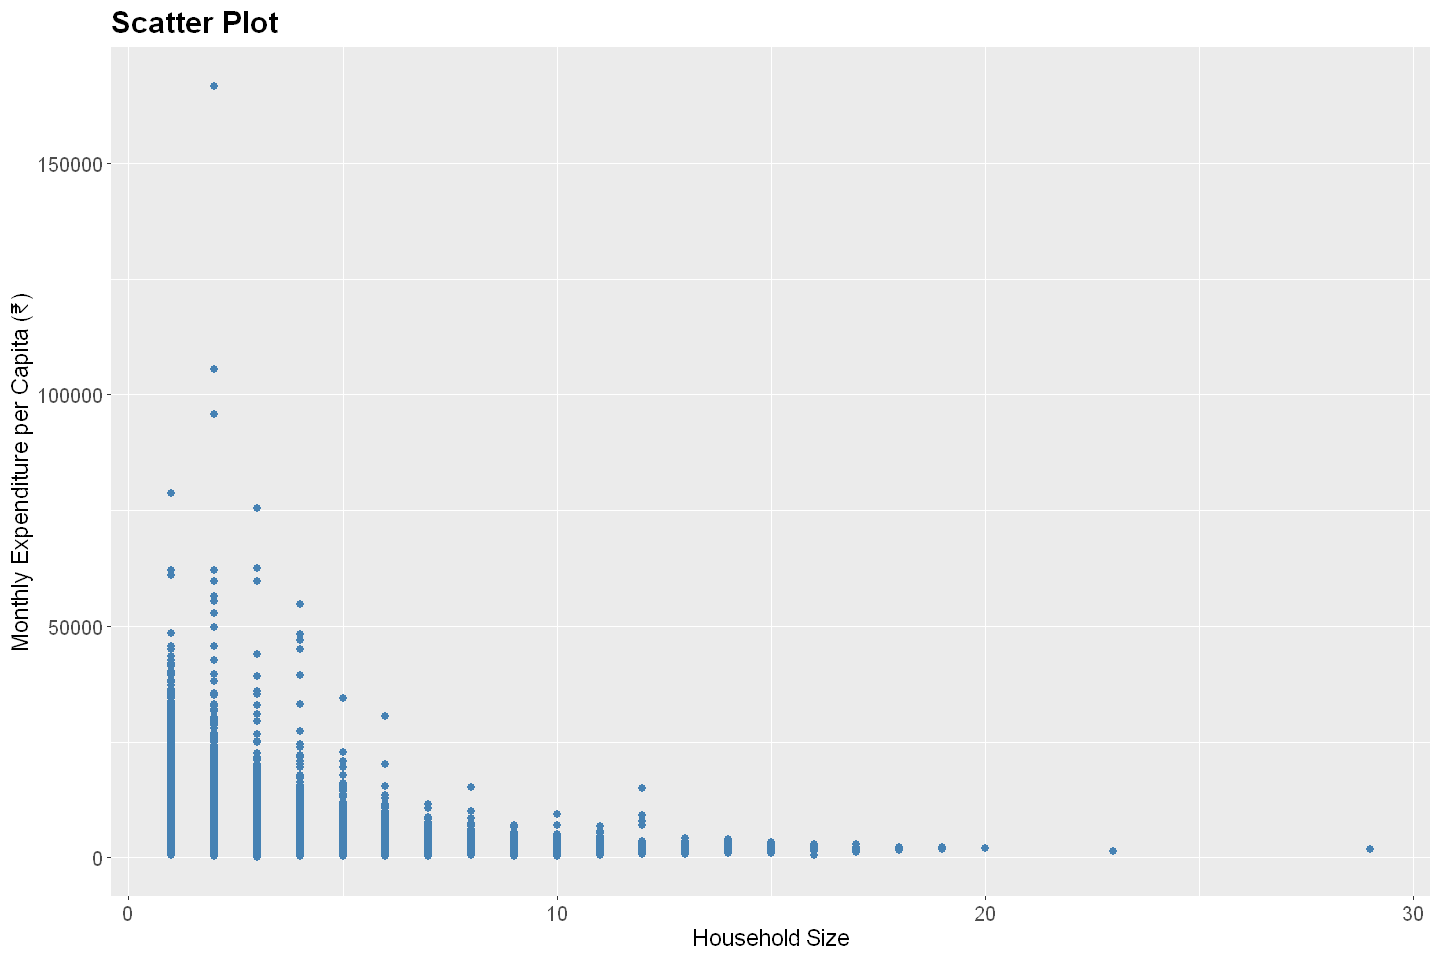

In [2]:
# Create a scatter plot
ggplot(data, aes(x = household_size, y = total_expenditure / household_size)) +
  geom_point(color = "steelblue", size = 2) +
  labs(
    title = "Scatter Plot",
    x = "Household Size",
    y = "Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

## Line Plot

A line plot is used to illustrate trends, changes, or patterns in a quantitative variable over an ordered dimension—such as time, sequence, or ranking. Each point on the line typically represents an aggregate value (e.g., mean, median, total) at a specific level of the ordering variable, and successive points are connected to emphasize continuity. Line plots are especially effective for identifying temporal trends, seasonality, structural breaks, and turning points in the data. They also help reveal smooth or abrupt shifts, long-term growth or decline, and any cyclical behavior that may warrant further investigation or modeling.

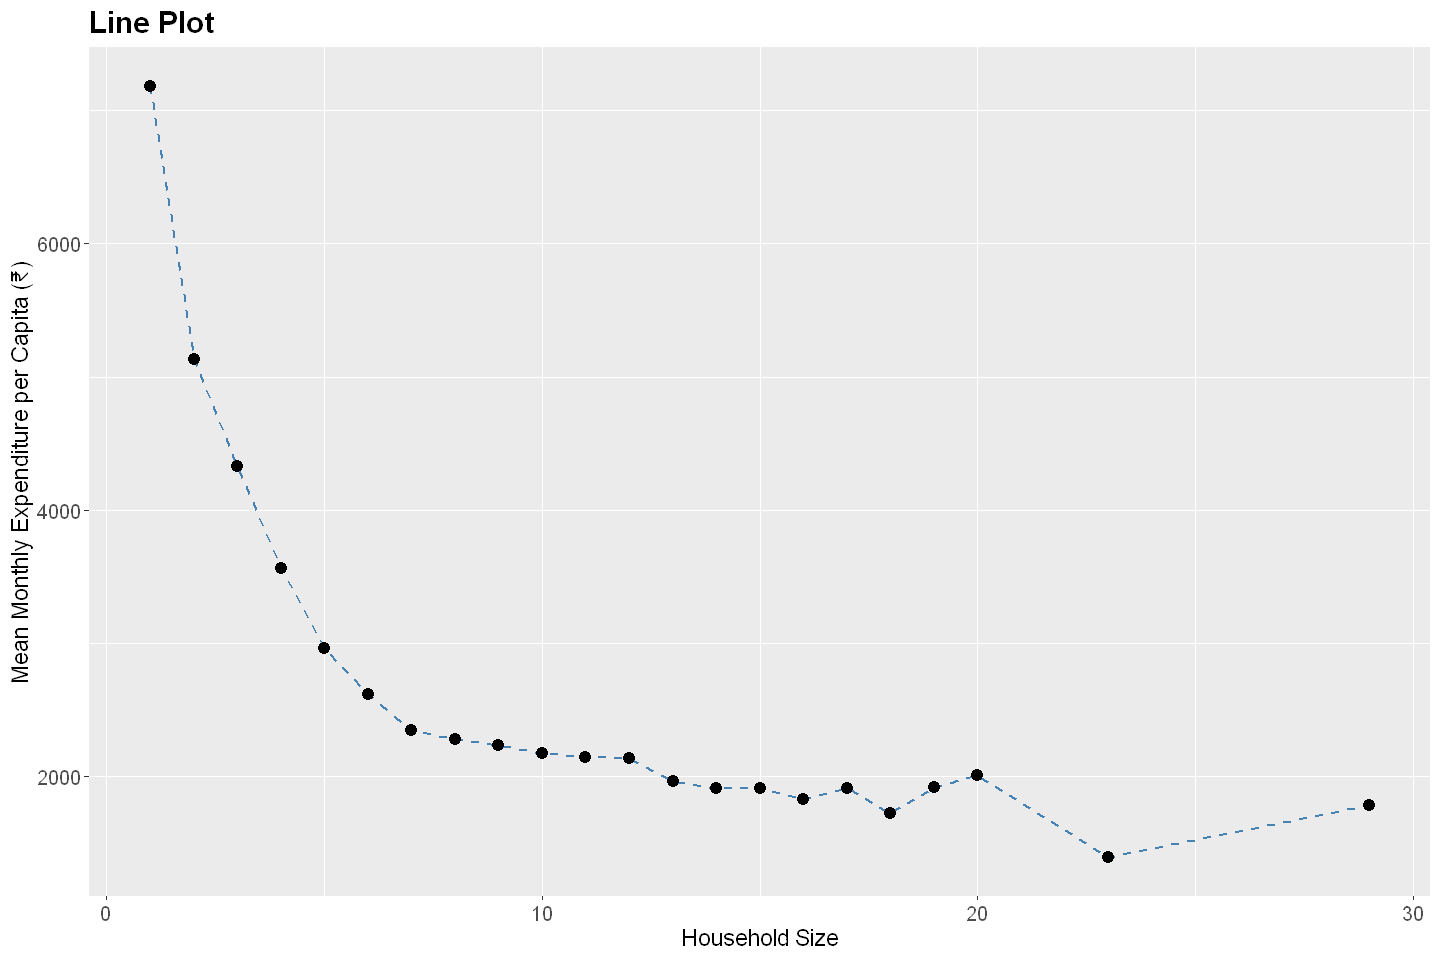

In [46]:
# Prepare data for mean monthly expenditure per capita by household size
df <- data %>%
  group_by(household_size) %>%
  summarise(mean_expenditure = mean(total_expenditure / household_size, na.rm = TRUE))

# Create a line plot
ggplot(df, aes(x = household_size, y = mean_expenditure)) +
  geom_line(color = "steelblue", size = 0.75, linetype = "dashed") +
  geom_point(color = "black", size = 3) +
  labs(
    title = "Line Plot",
    x = "Household Size",
    y = "Mean Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

# Bar Chart

A bar chart is used to compare quantitative values across discrete categories. Each bar represents the magnitude of a variable for a given category, making it easy to compare relative sizes. Bar charts help identify differences in category-level performance, highlight dominant or underrepresented groups, reveal patterns such as skewness or imbalance, and detect unexpected anomalies or outliers in categorical data.

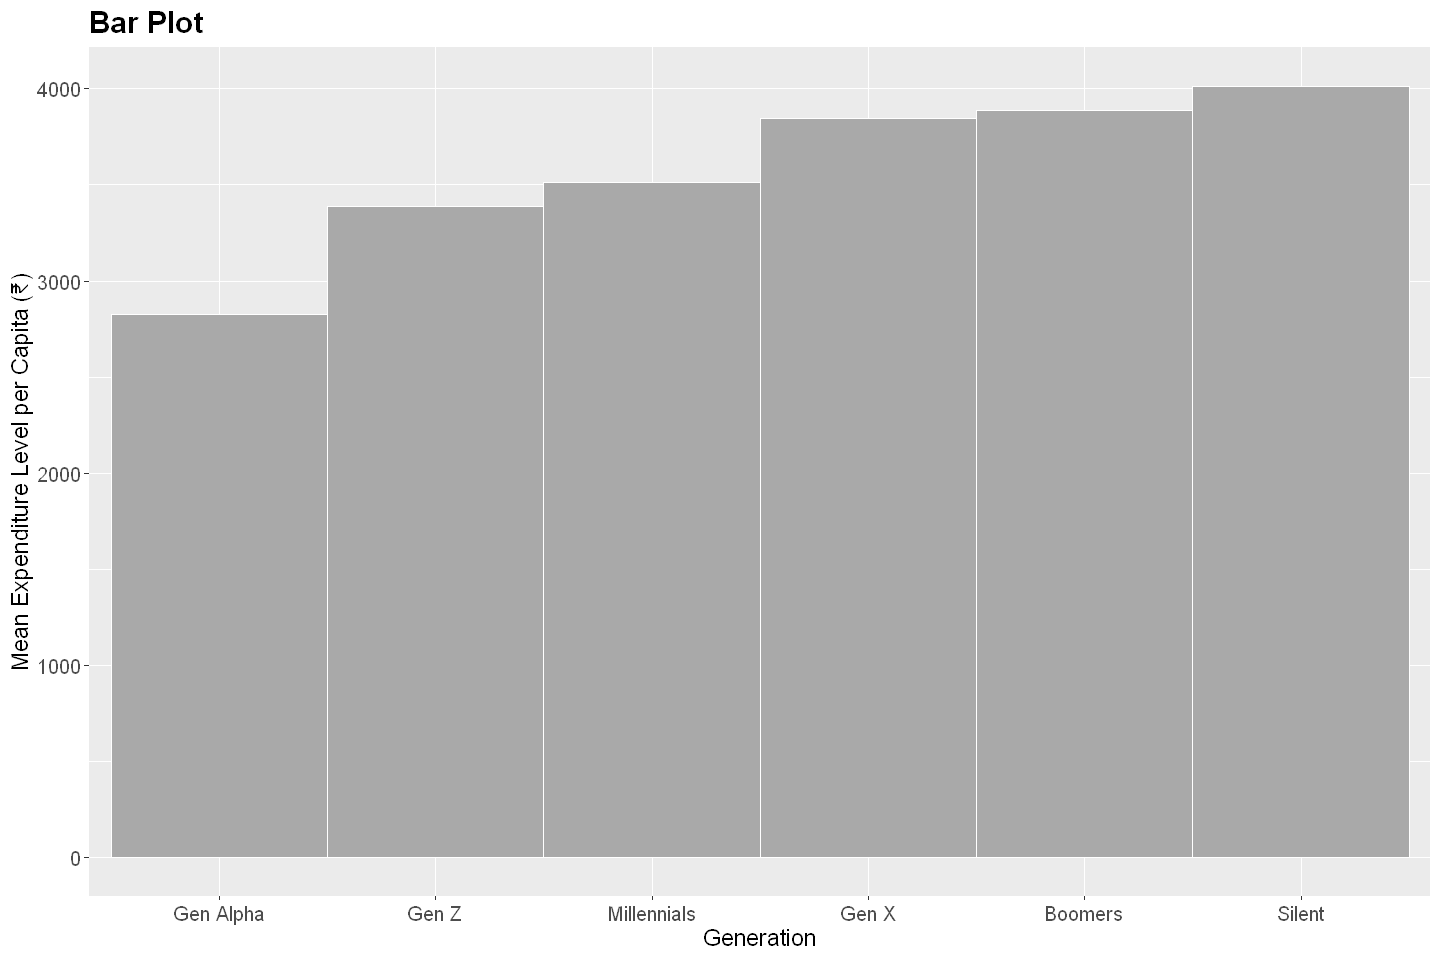

In [45]:
# Add generation column
data <- data %>%
  mutate(generation = case_when(
    age <= 12                    ~ "Gen Alpha",
    age >= 13 & age <= 28        ~ "Gen Z",
    age >= 29 & age <= 44        ~ "Millennials",
    age >= 45 & age <= 60        ~ "Gen X",
    age >= 61 & age <= 79        ~ "Boomers",
    age >= 80                    ~ "Silent",
  ))

# Prepare data for mean monthly expenditure per capita by generation
df <- data %>%
  group_by(generation) %>%
  summarise(mean_expenditure = mean(total_expenditure / household_size, na.rm = TRUE)) %>%
  mutate(generation = factor(generation, levels = c("Gen Alpha", "Gen Z", "Millennials", "Gen X", "Boomers", "Silent"))) %>%
  arrange(generation)

# Create a bar plot
ggplot(df, aes(x = generation, y = mean_expenditure, fill = generation)) +
  geom_bar(stat = "identity", width = 1, color = "white", fill = "darkgray") + 
  labs(
    title = "Bar Plot",
    x = "Generation",
    y = "Mean Expenditure Level per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

# Histogram

A histogram is used to visualize the distribution of a quantitative variable by dividing the range of values into contiguous intervals (bins) and displaying the frequency (or proportion) of observations falling within each bin. It provides insights into the data’s central tendency, spread, and overall shape (e.g., symmetry, skewness, modality). Histograms help identify patterns such as clustering, gaps, heavy tails, and deviations from normality. They are also useful for detecting outliers, assessing distributional assumptions, and informing choices for subsequent statistical modeling.

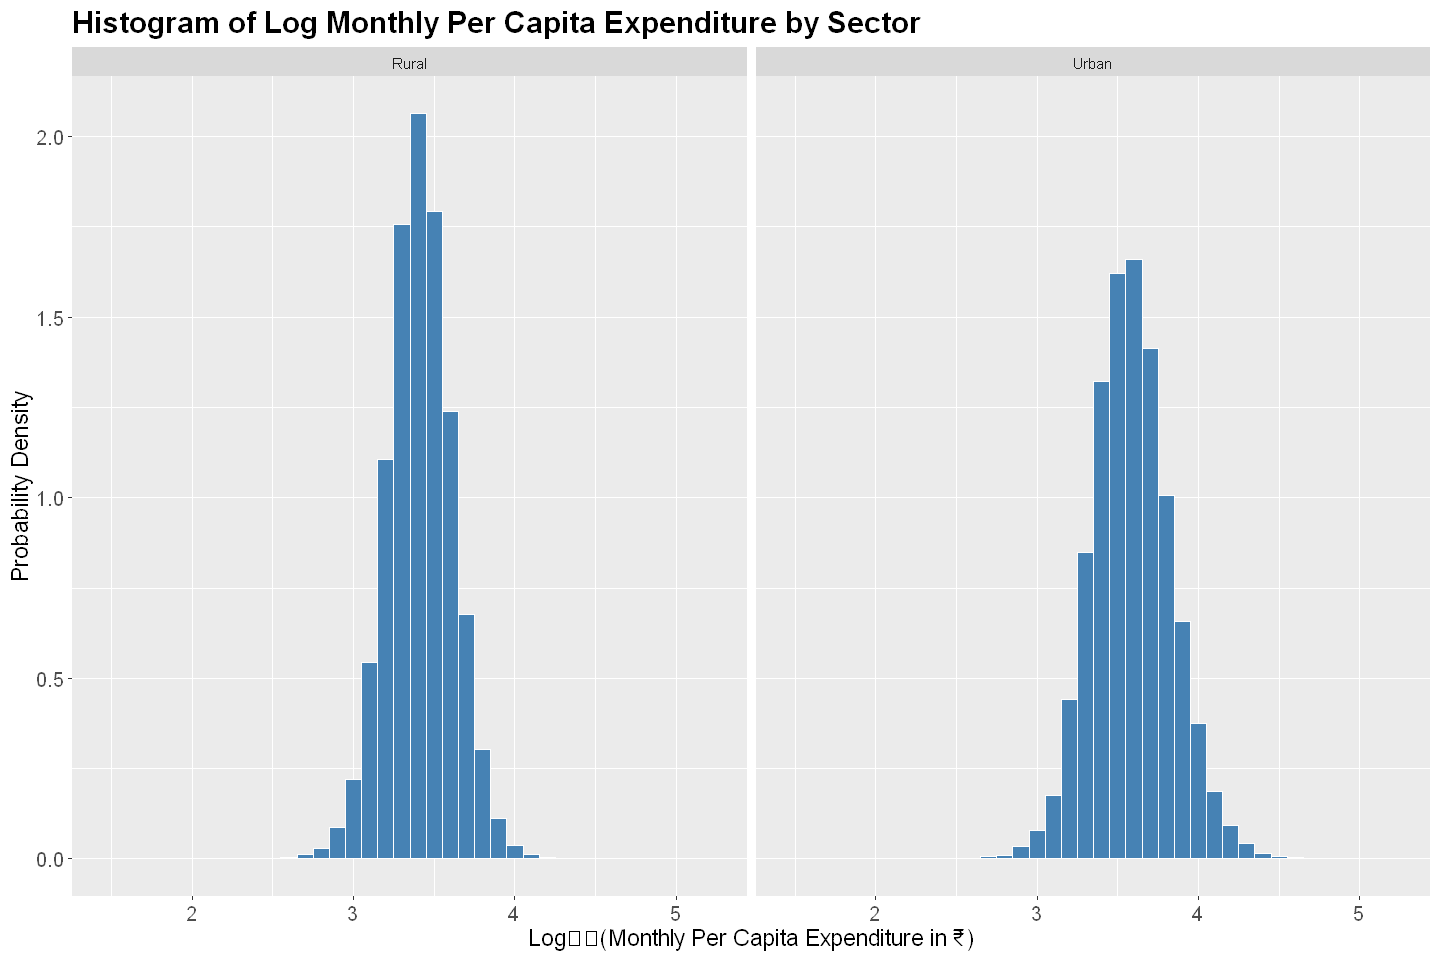

In [ ]:
# Create histogram
ggplot(data, aes(x = log10(total_expenditure / household_size), y = ..density..)) +
  geom_histogram(binwidth = 0.1, fill = "steelblue", color = "white") +
  facet_wrap(~ recode(factor(sector), `1` = "Rural", `2` = "Urban")) +
  labs(
    title = "Histogram",
    x = "Log Monthly Expenditure per Capita  (₹)",
    y = "Probability Density"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )


## Box Plot

A box plot is used to visualize the distribution of a quantitative variable through its five-number summary: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. The box represents the interquartile range (IQR), capturing the middle 50% of the data, while the "whiskers" extend to the smallest and largest values within 1.5 × IQR from the quartiles. Observations beyond this range are plotted individually as potential outliers. Box plots help identify patterns in central tendency, variability, skewness, and symmetry. They are particularly useful for comparing distributions across groups and for detecting outliers, shifts in medians, and differences in spread.

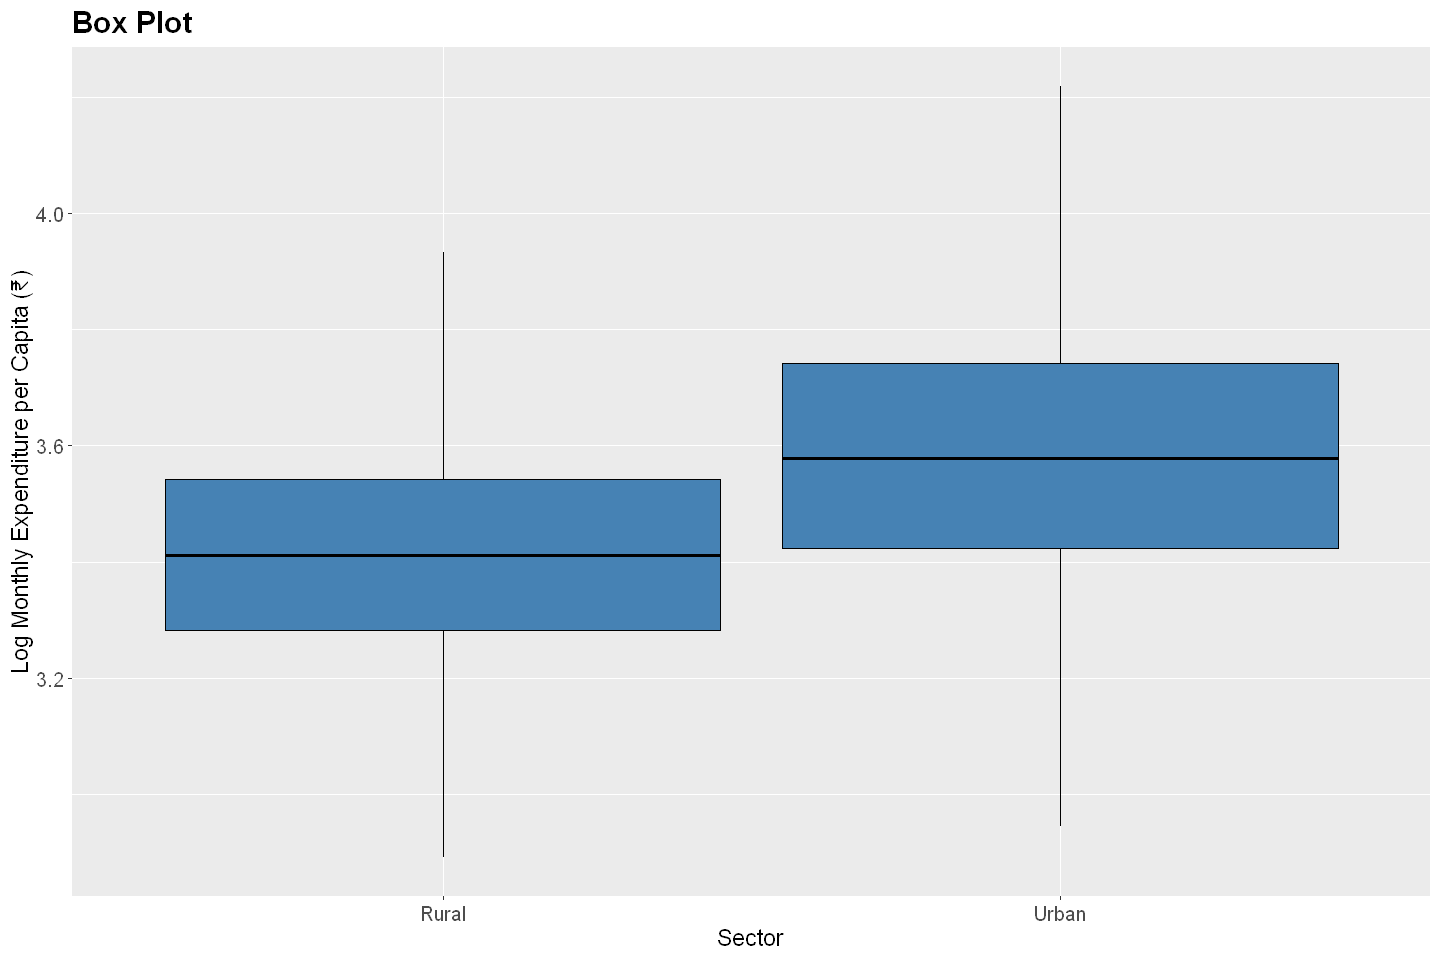

In [7]:
# Compute boxplot stats (min, Q1, median, Q3, max)
df <- data %>%
  group_by(sector) %>%
  summarise(
    min = quantile(log10(total_expenditure / household_size), 0.25, na.rm = TRUE) - 1.5 * (quantile(log10(total_expenditure / household_size), 0.75, na.rm = TRUE) - quantile(log10(total_expenditure / household_size), 0.25, na.rm = TRUE)),
    lower = quantile(log10(total_expenditure / household_size), 0.25, na.rm = TRUE),
    middle = median(log10(total_expenditure / household_size), na.rm = TRUE),
    upper = quantile(log10(total_expenditure / household_size), 0.75, na.rm = TRUE),
    max = quantile(log10(total_expenditure / household_size), 0.75, na.rm = TRUE) + 1.5 * (quantile(log10(total_expenditure / household_size), 0.75, na.rm = TRUE) - quantile(log10(total_expenditure / household_size), 0.25, na.rm = TRUE))
  )

# Create box plot
ggplot(df, aes(x = recode(factor(sector), `1` = "Rural", `2` = "Urban"))) +
  geom_boxplot(
    aes(
      min = min,
      lower = lower,
      middle = middle,
      upper = upper,
      max = max
    ),
    stat = "identity",
    fill = "steelblue",
    color = "black"
  ) +
  labs(
    title = "Box Plot",
    x = "Sector",
    y = "Log Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )


---

```{note}
Beyond the scatter plot, line plot, bar chart, histogram, and box plot, we also have advanced visualization tools such as heatmaps (for matrix-style data like OD matrices), density plots (for smoothed distributions), violin plots (to compare distribution shapes across categories), choropleth maps (to display aggregated values across geographic regions, such as zone-wise trip density or vehicle ownership), and geospatial maps (for spatially-referenced point or path data such as GPS traces or transit routes). Each of these enables a more nuanced representation of variability, spatial structure, or comparative patterns in transportation data.
```